There is a directed graph of n colored nodes and m edges. The nodes are numbered from 0 to n - 1.

You are given a string colors where colors[i] is a lowercase English letter representing the color of the ith node in this graph (0-indexed). You are also given a 2D array edges where edges[j] = [aj, bj] indicates that there is a directed edge from node aj to node bj.

A valid path in the graph is a sequence of nodes x1 -> x2 -> x3 -> ... -> xk such that there is a directed edge from xi to xi+1 for every 1 <= i < k. The color value of the path is the number of nodes that are colored the most frequently occurring color along that path.

Return the largest color value of any valid path in the given graph, or -1 if the graph contains a cycle.

 

Example 1:

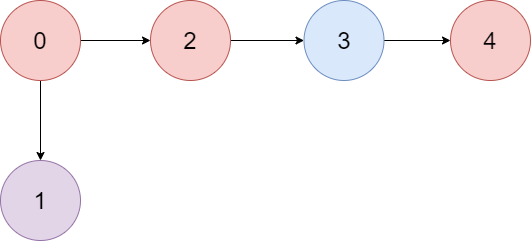

Input: colors = "abaca", edges = [[0,1],[0,2],[2,3],[3,4]]
Output: 3
Explanation: The path 0 -> 2 -> 3 -> 4 contains 3 nodes that are colored "a" (red in the above image).

Example 2:

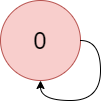

Input: colors = "a", edges = [[0,0]]
Output: -1
Explanation: There is a cycle from 0 to 0.
 

Constraints:

n == colors.length
m == edges.length
1 <= n <= 105
0 <= m <= 105
colors consists of lowercase English letters.
0 <= aj, bj < n

In [ ]:
class Solution:
    def largestPathValue(self, colors: str, edges: List[List[int]]) -> int:
        n, k = len(colors), 26
        indegrees = [0] * n
        graph = [[] for _ in range(n)]
        for u, v in edges:
            graph[u].append(v)
            indegrees[v] += 1
        zero_indegree = set(i for i in range(n) if indegrees[i] == 0)
        counts = [[0] * k for _ in range(n)]
        for i, c in enumerate(colors):
            counts[i][ord(c) - ord('a')] += 1
        max_count, visited = 0, 0
        while zero_indegree:
            u = zero_indegree.pop()
            visited += 1
            for v in graph[u]:
                for i in range(k):
                    counts[v][i] = max(counts[v][i], counts[u][i] + (ord(colors[v]) - ord('a') == i))
                indegrees[v] -= 1
                if indegrees[v] == 0:
                    zero_indegree.add(v)
            max_count = max(max_count, max(counts[u]))
        return max_count if visited == n else -1 

In [ ]:
class Solution:
    def largestPathValue(self, colors: str, edges: List[List[int]]) -> int:
        INF = float('inf')
        n = len(colors)
        adj = defaultdict(list)
        for u, v in edges:
            adj[u].append(v)
        
        count = [[0]*26 for _ in range(n)]
        vis = [0]*n
        
        def dfs(node):
            if vis[node] == 1:
                return INF   
            if vis[node] == 2:
                return count[node][ord(colors[node]) - ord('a')]
            
            vis[node] = 1
            for nxt in adj[node]:
                res = dfs(nxt)
                if res == INF:
                    return INF
                for c in range(26):
                    count[node][c] = max(count[node][c], count[nxt][c])
            
            col = ord(colors[node]) - ord('a')
            count[node][col] += 1
            vis[node] = 2  
            
            return count[node][col]
        
        ans = 0
        for i in range(n):
            val = dfs(i)
            if val == INF:
                return -1
            ans = max(ans, val)
        
        return ans